<a href="https://colab.research.google.com/github/analyticswithharry/RegressionAnalysisUsingPython/blob/main/Quantile_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Quantile Regression**

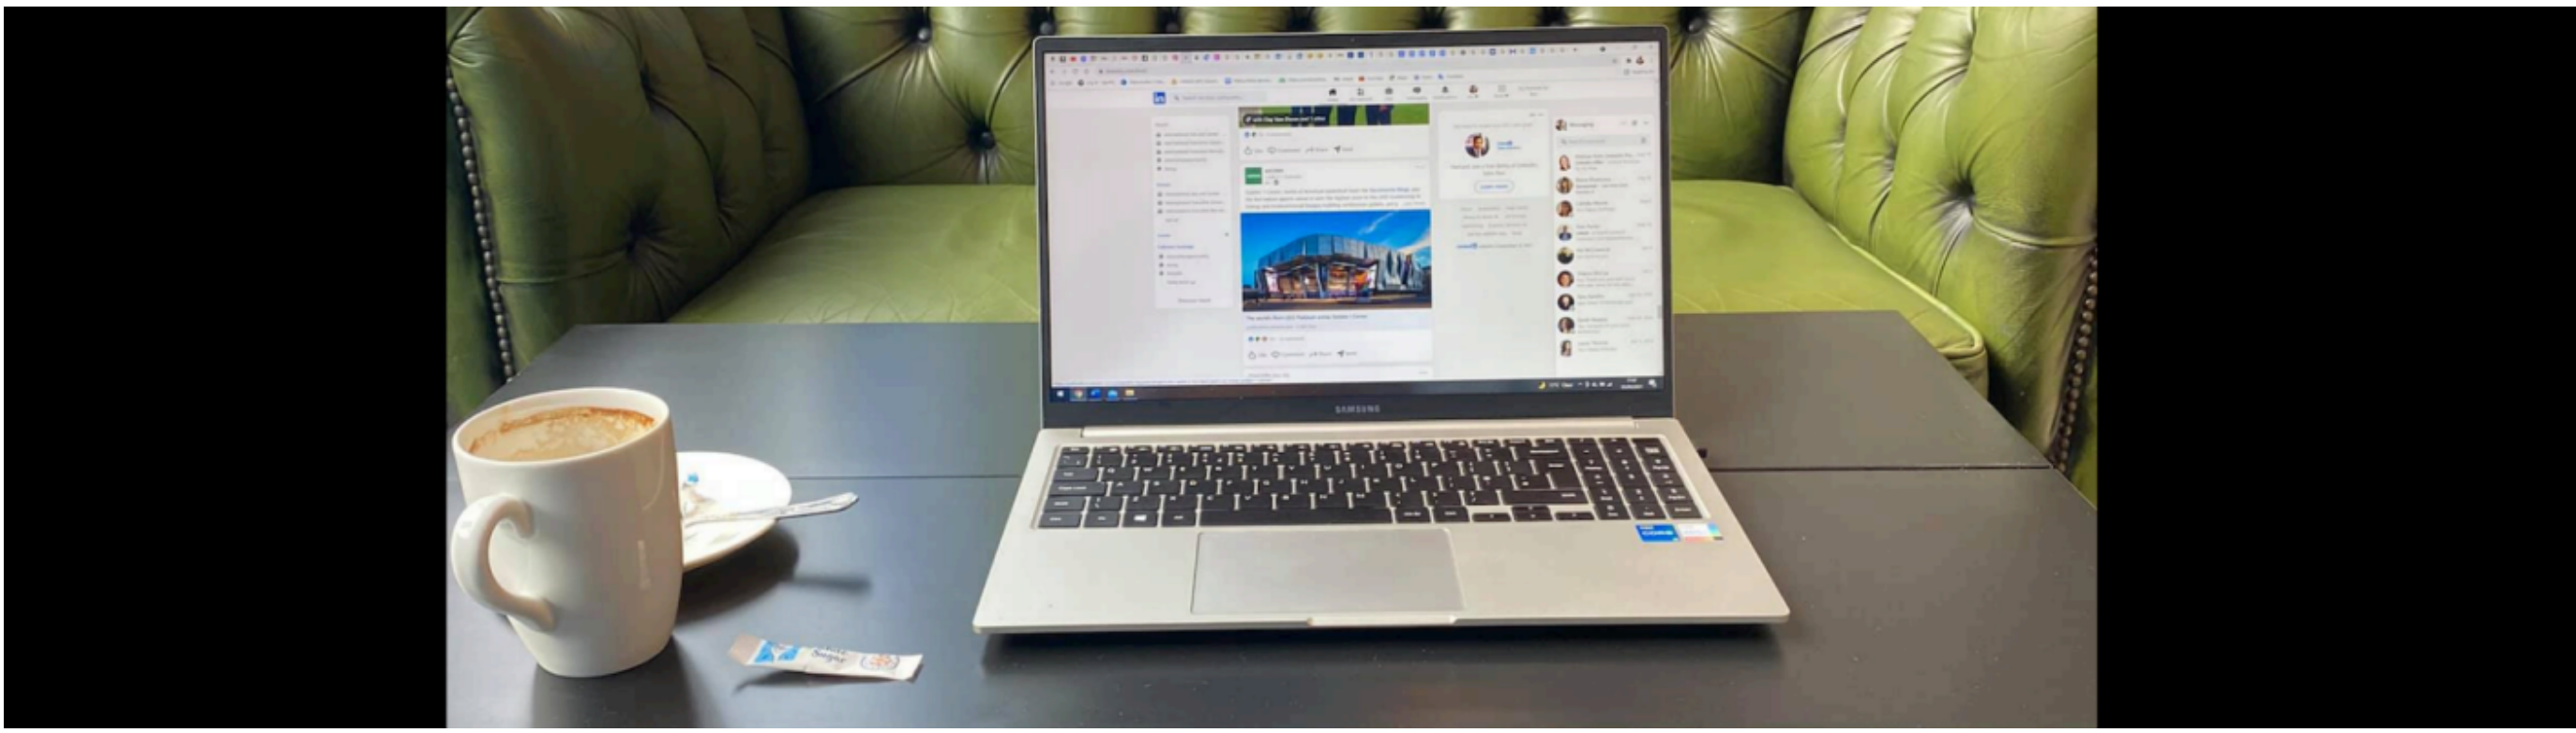

**HEMANT THAPA**

Linear Quantile Regression (LQR) is an extension of traditional linear regression that focuses on estimating conditional quantiles of the response variable rather than just the conditional mean. While linear regression predicts the mean of the dependent variable given certain independent variables, quantile regression can estimate any specified quantile (e.g., median, 90th percentile) of the dependent variable's distribution.

Quantile regression provides a more comprehensive analysis of the relationship between the independent and dependent variables, especially when the distribution of the data is skewed or has outliers. It allows for more robust predictions across different quantiles, offering insights into how the predictor variables affect various points in the distribution, not just the center.

### Linear Quantile Regression


$Q_{\tau}(Y|X) = X \beta_{\tau}$

Where:
- $Q_{\tau}(Y|X)$ is the $\tau$-th quantile of $Y$ given $X$,
- $X$ is the matrix of explanatory variables (predictors),
- $\beta_{\tau}$ is the vector of coefficients corresponding to the $\tau$-th quantile,
- $\tau$ is the quantile (ranging from 0 to 1, where $\tau = 0.5$ corresponds to the median).

The objective of quantile regression is to minimize a loss function that differs from the least squares loss used in ordinary regression. The quantile loss function $\rho_{\tau}(e)$ is defined as:

$\rho_{\tau}(e) =
\begin{cases}
\tau e & \text{if } e \geq 0, \\
(\tau - 1) e & \text{if } e < 0,
\end{cases}$

Where:
- $e = Y - X\beta$ is the residual (error term),
- $\tau$ is the quantile level.

The loss function is asymmetric, giving more weight to overestimates or underestimates depending on the value of $\tau$. For $\tau = 0.5$, this loss function corresponds to the **absolute deviation** loss, which is used to estimate the median. For $\tau$ closer to 1, the model gives more weight to overestimates.

Quantile regression is particularly useful in situations where the conditional distribution of the dependent variable is heteroscedastic, or the data contains extreme values or outliers that might unduly influence the mean.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# crearting random dataset
np.random.seed(0)
n = 1000
X = np.random.uniform(0, 10, size=n)
y = 2 * X + 3 + np.random.normal(scale=2, size=n)

In [ ]:
data = pd.DataFrame({'X': X, 'y': y})

In [ ]:
# intercept for the regression
X = sm.add_constant(data['X'])

In [ ]:
# quantile regression for 10th, 50th, and 90th percentiles
quantiles = [0.10, 0.50, 0.90]
models = {}
residuals = {}
metrics = {}

In [ ]:
# Fit models for different quantiles
for q in quantiles:
    model = QuantReg(data['y'], X)
    result = model.fit(q=q)
    models[q] = result
    y_pred = result.fittedvalues
    residuals[q] = data['y'] - y_pred

    # Metrics Calculation
    mse = mean_squared_error(data['y'], y_pred)
    mae = mean_absolute_error(data['y'], y_pred)

    # Pseudo-R² for quantile regression (using deviance)
    # Null deviance (fitting a constant median model)
    deviance_null = np.sum((data['y'] - np.median(data['y'])) ** 2)
    # Deviance for the fitted model
    deviance_model = np.sum((data['y'] - y_pred) ** 2)
    # Pseudo-R² calculation
    pseudo_r2 = 1 - (deviance_model / deviance_null)

    metrics[q] = {'Pseudo-R²': round(pseudo_r2,4), 'MAE': round(mae,4), 'MSE': round(mse,4)}

### Formula for Pseudo-$R^2$:

The pseudo-$R^2$ for quantile regression is given by:

$
R^2_{\text{pseudo}} = 1 - \frac{\text{Deviance}_{\text{model}}}{\text{Deviance}_{\text{null}}}
$


- **Deviance** is a measure of model fit, calculated as the sum of squared residuals (errors).
- **Deviance$_{\text{model}}$**: The deviance for the fitted quantile regression model, i.e., the sum of squared residuals for the predicted values.

$
\text{Deviance}_{\text{model}} = \sum \left( Y - \hat{Y} \right)^2
$

Where $\hat{Y}$ is the predicted value from the quantile regression model.
  
- **Deviance$_{\text{null}}$**: The deviance for a null model, which typically uses the median value as the prediction for all $Y$. The null model assumes that the best predictor for $Y$ is simply the median of $Y$.

$
\text{Deviance}_{\text{null}} = \sum \left( Y - \tilde{Y} \right)^2
$

Where $\tilde{Y}$ is the median of $Y$ (the constant prediction in the null model).


- The **pseudo-$R^2$** value ranges from 0 to 1, where:
  - A value close to 1 indicates that the model explains much of the variability in $Y$, similar to traditional $R^2$.
  - A value close to 0 indicates that the model provides little explanatory power compared to the null model.


In [ ]:
for q in quantiles:
    print(f"Quantile: {q}")
    print(metrics[q])
    print()

Quantile: 0.1
{'Pseudo-R²': 0.7328, 'MAE': 2.642, 'MSE': 9.8555}

Quantile: 0.5
{'Pseudo-R²': 0.8988, 'MAE': 1.5335, 'MSE': 3.7315}

Quantile: 0.9
{'Pseudo-R²': 0.7159, 'MAE': 2.7772, 'MSE': 10.476}



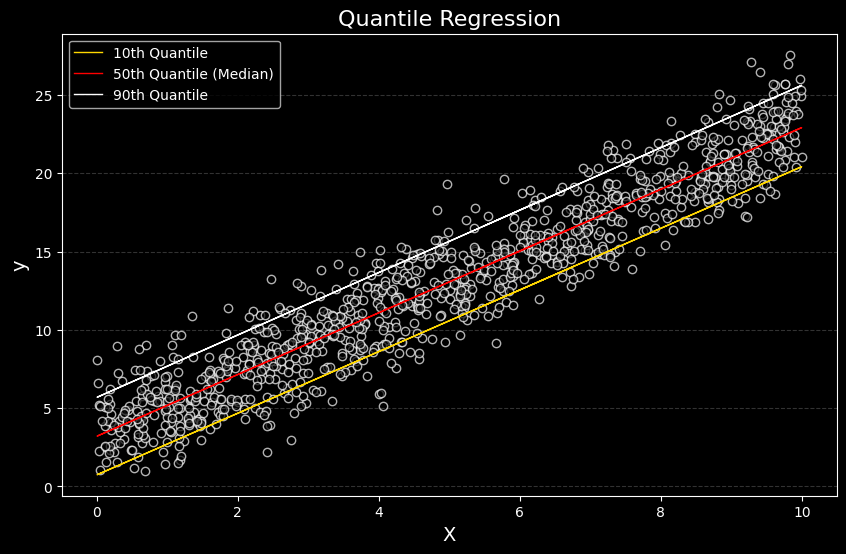

In [ ]:
# quantile regression lines
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['y'], alpha=0.7, color='black', marker='o', edgecolors='white')
plt.plot(data['X'], models[0.10].fittedvalues, label='10th Quantile', color='gold', linewidth=1)
plt.plot(data['X'], models[0.50].fittedvalues, label='50th Quantile (Median)', color='red', linewidth=1)
plt.plot(data['X'], models[0.90].fittedvalues, label='90th Quantile', color='white', linewidth=1)
plt.title('Quantile Regression', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid(True, axis='y', ls='--', alpha=0.2, color='white')
plt.show()

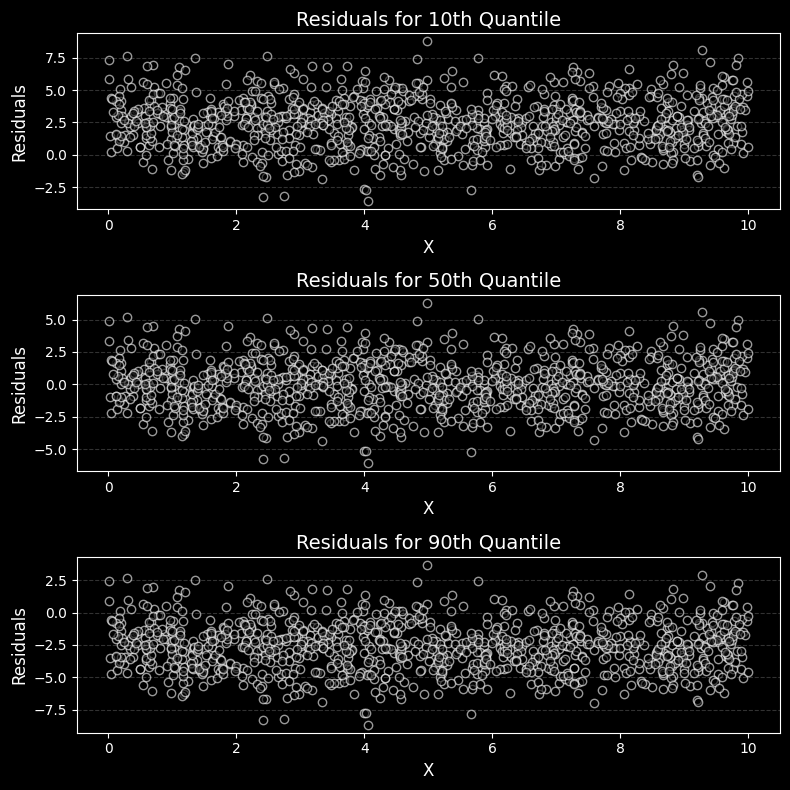

In [ ]:
# residuals for each quantile
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

for i, q in enumerate(quantiles):
    axs[i].scatter(data['X'], residuals[q], alpha=0.6, color='black', marker='o', edgecolors='white')
    axs[i].set_title(f'Residuals for {int(q*100)}th Quantile', fontsize=14)
    axs[i].set_xlabel('X', fontsize=12)
    axs[i].set_ylabel('Residuals', fontsize=12)
    axs[i].grid(True, axis='y', ls='--', alpha=0.2)

plt.tight_layout()
plt.show()

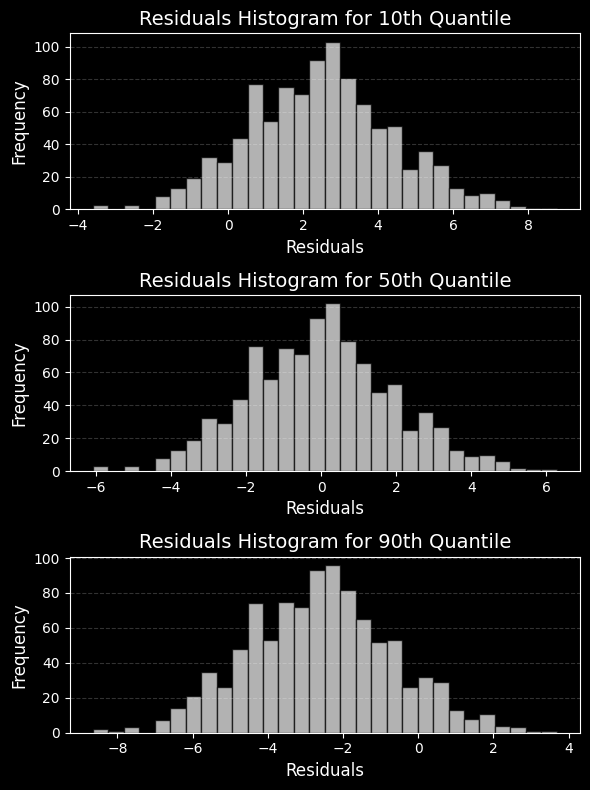

In [ ]:
# Residual histogram for each quantile regression
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

for i, q in enumerate(quantiles):
    axs[i].hist(residuals[q], bins=30, color='white', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Residuals Histogram for {int(q*100)}th Quantile', fontsize=14)
    axs[i].set_xlabel('Residuals', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True, axis='y', ls='--', alpha=0.2)

plt.tight_layout()
plt.show()